# Determining Moore's Law with real data in NumPy
![Scatter plot of MOS transistor count per microprocessor every two years as a demonstration of Moore's Law.](_static/01-mooreslaw-tutorial-intro.png)

_The number of transistors reported per a given chip plotted on a log scale in the y axis with the date of introduction on the linear scale x-axis. The blue data points are from a [transistor count table](https://en.wikipedia.org/wiki/Transistor_count#Microprocessors). The red line is an ordinary least squares prediction and the orange line is Moore's law._

## What you'll do

In 1965, engineer Gordon Moore
[predicted](https://en.wikipedia.org/wiki/Moore%27s_law) that
transistors on a chip would double every two years in the coming decade
[[1](https://en.wikipedia.org/wiki/Moore%27s_law),
[2](https://newsroom.intel.com/wp-content/uploads/sites/11/2018/05/moores-law-electronics.pdf)].
You'll compare Moore's prediction against actual transistor counts in
the 53 years following his prediction. You will determine the best-fit constants to describe the exponential growth of transistors on semiconductors compared to Moore's Law.


## Skills you'll learn


- Load data from a [\*.csv](https://en.wikipedia.org/wiki/Comma-separated_values) file
- Perform linear regression and predict exponential growth using ordinary least squares
- You'll compare exponential growth constants between models
- Share your analysis in a file:
    - as NumPy zipped files `*.npz`
    - as a `*.csv` file
- Assess the amazing progress semiconductor manufacturers have made in the last five decades

## What you'll need

**1.** These packages:

* NumPy
* [Matplotlib](https://matplotlib.org/)
* [statsmodels](https://www.statsmodels.org) ordinary linear regression

imported with the following commands

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

**2.** Since this is an exponential growth law you need a little background in doing math with [natural logs](https://en.wikipedia.org/wiki/Natural_logarithm) and [exponentials](https://en.wikipedia.org/wiki/Exponential_function).

You'll use these NumPy, Matplotlib, and statsmodels functions:

* [`np.loadtxt`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html): this function loads text into a NumPy array
* [`np.log`](https://numpy.org/doc/stable/reference/generated/numpy.log.html): this function takes the natural log of all elements in a NumPy array
* [`np.exp`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html): this function takes the exponential of all elements in a NumPy array
* [`lambda`](https://docs.python.org/3/library/ast.html?highlight=lambda#ast.Lambda): this is a minimal function definition for creating a function model
* [`plt.semilogy`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.semilogy.html): this function will plot x-y data onto a figure with a linear x-axis and $\log_{10}$ y-axis
[`plt.plot`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html): this function will plot x-y data on linear axes
* [`sm.OLS`](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html): find fitting parameters and standard errors using the statsmodels ordinary least squares model
* slicing arrays: view parts of the data loaded into the workspace, slice the arrays e.g. `x[:10]` for the first 10 values in the array, `x`
* boolean array indexing: to view parts of the data that match a given condition use boolean operations to index an array
* [`np.block`](https://numpy.org/doc/stable/reference/generated/numpy.block.html): to combine arrays into 2D arrays
* [`np.newaxis`](https://numpy.org/doc/stable/reference/constants.html): to change a 1D vector to a row or column vector
* [`np.savez`](https://numpy.org/doc/stable/reference/generated/numpy.savez.html) and [`np.savetxt`](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html): these two functions will save your arrays in zipped array format and text, respectively

---

## Building Moore's law as an exponential function

Your empirical model assumes that the number of transistors per
semiconductor follows an exponential growth,

$\log(\text{transistor_count})= f(\text{year}) = A\cdot \text{year}+B,$

where $A$ and $B$ are fitting constants. You use semiconductor
manufacturers' data to find the fitting constants.

You determine these constants for Moore's law by specifying the
rate for added transistors, 2, and giving an initial number of transistors for a given year.

You state Moore's law in an exponential form as follows,

$\text{transistor_count}= e^{A_M\cdot \text{year} +B_M}.$

Where $A_M$ and $B_M$ are constants that double the number of transistors every two years and start at 2250 transistors in 1971,

1. $\dfrac{\text{transistor_count}(\text{year} +2)}{\text{transistor_count}(\text{year})} = 2 = \dfrac{e^{B_M}e^{A_M \text{year} + 2A_M}}{e^{B_M}e^{A_M \text{year}}} = e^{2A_M} \rightarrow A_M = \frac{\log(2)}{2}$

2. $\log(2250) = \frac{\log(2)}{2}\cdot 1971 + B_M \rightarrow B_M = \log(2250)-\frac{\log(2)}{2}\cdot 1971$

so Moore's law stated as an exponential function is

$\log(\text{transistor_count})= A_M\cdot \text{year}+B_M,$

where

$A_M=0.3466$

$B_M=-675.4$

Since the function represents Moore's law, define it as a Python
function using
[`lambda`](https://docs.python.org/3/library/ast.html?highlight=lambda#ast.Lambda)

In [2]:
A_M = np.log(2) / 2
B_M = np.log(2250) - A_M * 1971
Moores_law = lambda year: np.exp(B_M) * np.exp(A_M * year)

In 1971, there were 2250 transistors on the Intel 4004 chip. Use
`Moores_law` to check the number of semiconductors Gordon Moore would expect
in 1973.

In [3]:
ML_1971 = Moores_law(1971)
ML_1973 = Moores_law(1973)
print("In 1973, G. Moore expects {:.0f} transistors on Intels chips".format(ML_1973))
print("This is x{:.2f} more transistors than 1971".format(ML_1973 / ML_1971))

In 1973, G. Moore expects 4500 transistors on Intels chips
This is x2.00 more transistors than 1971


## Loading historical manufacturing data to your workspace

Now, make a prediction based upon the historical data for
semiconductors per chip. The [Transistor Count
\[4\]](https://en.wikipedia.org/wiki/Transistor_count#Microprocessors)
each year is in the `transistor_data.csv` file. Before loading a \*.csv
file into a NumPy array, its a good idea to inspect the structure of the
file first. Then, locate the columns of interest and save them to a
variable. Save two columns of the file to the array, `data`.

Here, print out the first 10 rows of `transistor_data.csv`. The columns are

|Processor|MOS transistor count|Date of Introduction|Designer|MOSprocess|Area|
|---|---|---|---|---|---|
|Intel 4004 (4-bit  16-pin)|2250|1971|Intel|"10,000 nm"|12 mm²|
|...|...|...|...|...|...|

In [4]:
! head transistor_data.csv

Processor,MOS transistor count,Date of Introduction,Designer,MOSprocess,Area
Intel 4004 (4-bit  16-pin),2250,1971,Intel,"10,000 nm",12 mm²
Intel 8008 (8-bit  18-pin),3500,1972,Intel,"10,000 nm",14 mm²
NEC μCOM-4 (4-bit  42-pin),2500,1973,NEC,"7,500 nm",?
Intel 4040 (4-bit  16-pin),3000,1974,Intel,"10,000 nm",12 mm²
Motorola 6800 (8-bit  40-pin),4100,1974,Motorola,"6,000 nm",16 mm²
Intel 8080 (8-bit  40-pin),6000,1974,Intel,"6,000 nm",20 mm²
TMS 1000 (4-bit  28-pin),8000,1974,Texas Instruments,"8,000 nm",11 mm²
MOS Technology 6502 (8-bit  40-pin),4528,1975,MOS Technology,"8,000 nm",21 mm²
Intersil IM6100 (12-bit  40-pin; clone of PDP-8),4000,1975,Intersil,,


You don't need the columns that specify __Processor__, __Designer__,
__MOSprocess__, or __Area__. That leaves the second and third columns,
__MOS transistor count__ and __Date of Introduction__, respectively.

Next, you load these two columns into a NumPy array using
[`np.loadtxt`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html).
The extra options below will put the data in the desired format:

* `delimiter = ','`: specify delimeter as a comma ',' (this is the default behavior)
* `usecols = [1,2]`: import the second and third columns from the csv
* `skiprows = 1`: do not use the first row, because its a header row

In [5]:
data = np.loadtxt("transistor_data.csv", delimiter=",", usecols=[1, 2], skiprows=1)

You loaded the entire history of semiconducting into a NumPy array named
`data`. The first column is the __MOS transistor count__ and the second
column is the __Date of Introduction__ in a four-digit year.

Next, make the data easier to read and manage by assigning the two
columns to variables, `year` and `transistor_count`. Print out the first
10 values by slicing the `year` and `transistor_count` arrays with
`[:10]`. Print these values out to check that you have the saved the
data to the correct variables.

In [6]:
year = data[:, 1]  # grab the second column and assign
transistor_count = data[:, 0]  # grab the first column and assign

print("year:\t\t", year[:10])
print("trans. cnt:\t", transistor_count[:10])

year:		 [1971. 1972. 1973. 1974. 1974. 1974. 1974. 1975. 1975. 1975.]
trans. cnt:	 [2250. 3500. 2500. 3000. 4100. 6000. 8000. 4528. 4000. 5000.]


You are creating a function that predicts the transistor count given a
year. You have an _independent variable_, `year`, and a _dependent
variable_, `transistor_count`. Transform the independent variable to
log-scale,

$y_i = \log($ `transistor_count[i]` $),$

resulting in a linear equation,

$y_i = A\cdot \text{year} +B$.

In [7]:
yi = np.log(transistor_count)

## Calculating the historical growth curve for transistors

Your model assume that `yi` is a function of `year`. Now, find the best-fit model that minimizes the difference between $y_i$ and $A\cdot \text{year} +B, $ as such

$\min \sum|y_i - (A\cdot \text{year}_i + B)|^2.$

This [sum of squares
error](https://en.wikipedia.org/wiki/Ordinary_least_squares) can be
succinctly represented as arrays as such

$\sum|\mathbf{y}-\mathbf{Z} [A,~B]^T|^2,$

where $\mathbf{y}$ are the observations of the log of the number of
transistors in a 1D array and $\mathbf{Z}=[\text{year}_i^1,~\text{year}_i^0]$ are the
polynomial terms for $\text{year}_i$ in the first and second columns. By
creating this set of regressors in the $\mathbf{Z}-$matrix you set
up an ordinary least squares statistical model. Some clever
NumPy array features will build $\mathbf{Z}$

1. `year[:,np.newaxis]` : takes the 1D array with shape `(179,)` and turns it into a 2D column vector with shape `(179,1)`
2. `**[1, 0]` : stacks two columns, in the first column is `year**1` and the second column is `year**0 == 1`

In [8]:
Z = year[:, np.newaxis] ** [1, 0]

Now that you have the created a matrix of regressors, $\mathbf{Z},$ and
the observations are in vector, $\mathbf{y},$ you can use these
variables to build the an ordinary least squares model with
[`sm.OLS`](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html).

In [9]:
model = sm.OLS(yi, Z)

Now, you can view the fitting constants, $A$ and $B$, and their standard
errors.  Run the
[`fit`](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html) and print the
[`summary`](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.summary.html) to view results as such,

In [10]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     3309.
Date:                Wed, 01 Jun 2022   Prob (F-statistic):          1.75e-116
Time:                        11:49:37   Log-Likelihood:                -273.43
No. Observations:                 179   AIC:                             550.9
Df Residuals:                     177   BIC:                             557.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3416      0.006     57.521      0.0

The __OLS Regression Results__ summary gives a lot of information about
the regressors, $\mathbf{Z},$ and observations, $\mathbf{y}.$ The most
important outputs for your current analysis are

```
=================================
                 coef    std err
---------------------------------
x1             0.3416      0.006
const       -666.3264     11.890
=================================
```
where `x1` is slope, $A=0.3416$, `const` is the intercept,
$B=-666.364$, and `std error` gives the precision of constants
$A=0.342\pm 0.006~\dfrac{\log(\text{transistors}/\text{chip})}{\text{years}}$ and $B=-666\pm
12~\log(\text{transistors}/\text{chip}),$ where the units are in
$\log(\text{transistors}/\text{chip})$. You created an exponential growth model.
To get the constants, save them to an array `AB` with
`results.params` and assign $A$ and $B$ to `x1` and `constant`.

In [11]:
AB = results.params
A = AB[0]
B = AB[1]

Did manufacturers double the transistor count every two years? You have
the final formula,

$\dfrac{\text{transistor_count}(\text{year} +2)}{\text{transistor_count}(\text{year})} = xFactor =
\dfrac{e^{B}e^{A( \text{year} + 2)}}{e^{B}e^{A \text{year}}} = e^{2A}$

where increase in number of transistors is $xFactor,$ number of years is
2, and $A$ is the best fit slope on the semilog function. The error in
your
prediction, $\Delta(xFactor),$ comes from the precision of your constant
$A,$ which you calculated as the standard error $\Delta A= 0.006$.

$\Delta (xFactor) = \frac{\partial}{\partial A}(e^{2A})\Delta A = 2Ae^{2A}\Delta A$

In [12]:
print("Rate of semiconductors added on a chip every 2 years:")
print(
    "\tx{:.2f} +/- {:.2f} semiconductors per chip".format(
        np.exp((A) * 2), 2 * A * np.exp(2 * A) * 0.006
    )
)

Rate of semiconductors added on a chip every 2 years:
	x1.98 +/- 0.01 semiconductors per chip


Based upon your least-squares regression model, the number of
semiconductors per chip increased by a factor of $1.98\pm 0.01$ every two
years. You have a model that predicts the number of semiconductors each
year. Now compare your model to the actual manufacturing reports.  Plot
the linear regression results and all of the transistor counts.

Here, use
[`plt.semilogy`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.semilogy.html)
to plot the number of transistors on a log-scale and the year on a
linear scale. You have defined a three arrays to get to a final model

$y_i = \log(\text{transistor_count}),$

$y_i = A \cdot \text{year} + B,$

and

$\log(\text{transistor_count}) = A\cdot \text{year} + B,$

your variables, `transistor_count`, `year`, and `yi` all have the same
dimensions, `(179,)`. NumPy arrays need the same dimensions to make a
plot. The predicted number of transistors is now

$\text{transistor_count}_{\text{predicted}} = e^Be^{A\cdot \text{year}}$.

In the next plot, use the
[`fivethirtyeight`](https://matplotlib.org/3.1.1/gallery/style_sheets/fivethirtyeight.html)
style sheet.
The style sheet replicates
https://fivethirtyeight.com elements. Change the matplotlib style with
[`plt.style.use`](https://matplotlib.org/3.3.2/api/style_api.html#matplotlib.style.use).

Text(0, 0.5, '# of transistors\nper microprocessor')

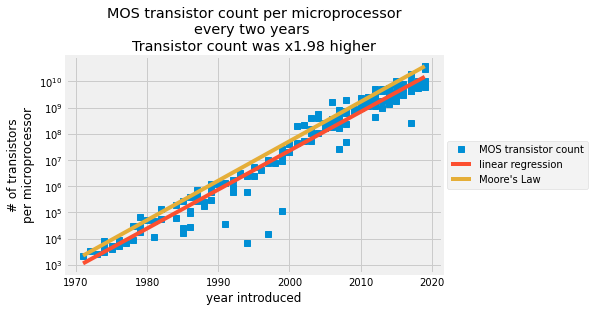

In [13]:
transistor_count_predicted = np.exp(B) * np.exp(A * year)
transistor_Moores_law = Moores_law(year)
plt.style.use("fivethirtyeight")
plt.semilogy(year, transistor_count, "s", label="MOS transistor count")
plt.semilogy(year, transistor_count_predicted, label="linear regression")


plt.plot(year, transistor_Moores_law, label="Moore's Law")
plt.title(
    "MOS transistor count per microprocessor\n"
    + "every two years \n"
    + "Transistor count was x{:.2f} higher".format(np.exp(A * 2))
)
plt.xlabel("year introduced")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.ylabel("# of transistors\nper microprocessor")

_A scatter plot of MOS transistor count per microprocessor every two years with a red line for the ordinary least squares prediction and an orange line for Moore's law._

The linear regression captures the increase in the number of transistors
per semiconductors each year.  In 2015, semiconductor manufacturers
claimed they could not keep up with Moore's law anymore. Your analysis
shows that since 1971, the average increase in transistor count was
x1.98 every 2 years, but Gordon Moore predicted it would be x2
every 2 years. That is an amazing prediction.

Consider the year 2017. Compare the data to your linear regression
model and Gordon Moore's prediction. First, get the
transistor counts from the year 2017. You can do this with a Boolean
comparator,

`year == 2017`.

Then, make a prediction for 2017 with `Moores_law` defined above
and plugging in your best fit constants into your function

$\text{transistor_count} = e^{B}e^{A\cdot \text{year}}$.

A great way to compare these measurements is to compare your prediction
and Moore's prediction to the average transistor count and look at the
range of reported values for that year. Use the
[`plt.plot`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html)
option,
[`alpha=0.2`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.artist.Artist.set_alpha.html),
to increase the transparency of the data. The more opaque the points
appear, the more reported values lie on that measurement. The green $+$
is the average reported transistor count for 2017. Plot your predictions
for $\pm\frac{1}{2}~years.

19200000000.0 250000000.0 7050000000.0


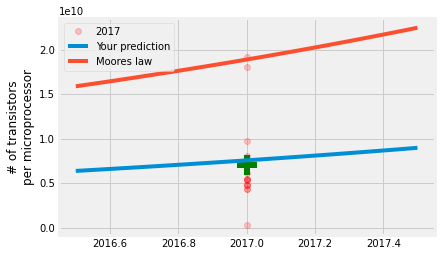

In [14]:
transistor_count2017 = transistor_count[year == 2017]
print(
    transistor_count2017.max(), transistor_count2017.min(), transistor_count2017.mean()
)
y = np.linspace(2016.5, 2017.5)
your_model2017 = np.exp(B) * np.exp(A * y)
Moore_Model2017 = Moores_law(y)

plt.plot(
    2017 * np.ones(np.sum(year == 2017)),
    transistor_count2017,
    "ro",
    label="2017",
    alpha=0.2,
)
plt.plot(2017, transistor_count2017.mean(), "g+", markersize=20, mew=6)

plt.plot(y, your_model2017, label="Your prediction")
plt.plot(y, Moore_Model2017, label="Moores law")
plt.ylabel("# of transistors\nper microprocessor")
plt.legend()

The result is that your model is close to the mean, but Gordon
Moore's prediction is closer to the maximum number of transistors per
microprocessor produced in 2017. Even though semiconductor manufacturers
thought that the growth would slow, once in 1975 and now again
approaching 2025, manufacturers are still producing semiconductors every 2 years that
nearly double the number of transistors.

The linear regression model is much better at predicting the
average than extreme values because it satisfies the condition to
minimize $\sum |y_i - A\cdot \text{year}[i]+B|^2$.

## Sharing your results as zipped arrays and a csv

The last step, is to share your findings. You created
new arrays that represent a linear regression model and Gordon Moore's
prediction. You started this process by importing a csv file into a NumPy
array using `np.loadtxt`, to save your model use two approaches

1. [`np.savez`](https://numpy.org/doc/stable/reference/generated/numpy.savez.html): save NumPy arrays for other Python sessions
2. [`np.savetxt`](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html): save a csv file with the original data and your predicted data

### Zipping the arrays into a file
Using `np.savez`, you can save thousands of arrays and give them names. The
function `np.load` will load the arrays back into the workspace as a
dictionary. You'll save a five arrays so the next user will have the year,
transistor count, predicted transistor count,  Gordon Moore's
predicted count, and fitting constants. Add one more variable that other users can use to
understand the model, `notes`.

In [15]:
notes = "the arrays in this file are the result of a linear regression model\n"
notes += "the arrays include\nyear: year of manufacture\n"
notes += "transistor_count: number of transistors reported by manufacturers in a given year\n"
notes += "transistor_count_predicted: linear regression model = exp({:.2f})*exp({:.2f}*year)\n".format(
    B, A
)
notes += "transistor_Moores_law: Moores law =exp({:.2f})*exp({:.2f}*year)\n".format(
    B_M, A_M
)
notes += "regression_csts: linear regression constants A and B for log(transistor_count)=A*year+B"
print(notes)

the arrays in this file are the result of a linear regression model
the arrays include
year: year of manufacture
transistor_count: number of transistors reported by manufacturers in a given year
transistor_count_predicted: linear regression model = exp(-666.33)*exp(0.34*year)
transistor_Moores_law: Moores law =exp(-675.38)*exp(0.35*year)
regression_csts: linear regression constants A and B for log(transistor_count)=A*year+B


In [16]:
np.savez(
    "mooreslaw_regression.npz",
    notes=notes,
    year=year,
    transistor_count=transistor_count,
    transistor_count_predicted=transistor_count_predicted,
    transistor_Moores_law=transistor_Moores_law,
    regression_csts=AB,
)

In [17]:
results = np.load("mooreslaw_regression.npz")

In [18]:
print(results["regression_csts"][1])

-666.3264063536254


In [19]:
! ls

air-quality-data.csv
mooreslaw_regression.npz
mooreslaw-tutorial.md
pairing.md
save-load-arrays.md
_static
text_preprocessing.py
transistor_data.csv
tutorial-air-quality-analysis.md
tutorial-deep-learning-on-mnist.md
tutorial-deep-reinforcement-learning-with-pong-from-pixels.md
tutorial-ma.md
tutorial-nlp-from-scratch
tutorial-nlp-from-scratch.md
tutorial-plotting-fractals
tutorial-plotting-fractals.md
tutorial-static_equilibrium.md
tutorial-style-guide.md
tutorial-svd.md
tutorial-x-ray-image-processing
tutorial-x-ray-image-processing.md
who_covid_19_sit_rep_time_series.csv
x_y-squared.csv
x_y-squared.npz


The benefit of `np.savez` is you can save hundreds of arrays with
different shapes and types. Here, you saved 4 arrays that are double
precision floating point numbers shape = `(179,)`, one array that was
text, and one array of double precision floating point numbers shape =
`(2,).` This is the preferred method for saving NumPy arrays for use in
another analysis.

### Creating your own comma separated value file

If you want to share data and view the results in a table, then you have to
create a text file. Save the data using `np.savetxt`. This
function is more limited than `np.savez`. Delimited files, like csv's,
need 2D arrays.

Prepare the data for export by creating a new 2D array whose columns
contain the data of interest.

Use the `header` option to describe the data and the columns of
the file. Define another variable that contains file
information as `head`.

In [20]:
head = "the columns in this file are the result of a linear regression model\n"
head += "the columns include\nyear: year of manufacture\n"
head += "transistor_count: number of transistors reported by manufacturers in a given year\n"
head += "transistor_count_predicted: linear regression model = exp({:.2f})*exp({:.2f}*year)\n".format(
    B, A
)
head += "transistor_Moores_law: Moores law =exp({:.2f})*exp({:.2f}*year)\n".format(
    B_M, A_M
)
head += "year:, transistor_count:, transistor_count_predicted:, transistor_Moores_law:"
print(head)

the columns in this file are the result of a linear regression model
the columns include
year: year of manufacture
transistor_count: number of transistors reported by manufacturers in a given year
transistor_count_predicted: linear regression model = exp(-666.33)*exp(0.34*year)
transistor_Moores_law: Moores law =exp(-675.38)*exp(0.35*year)
year:, transistor_count:, transistor_count_predicted:, transistor_Moores_law:


Build a single 2D array to export to csv. Tabular data is inherently two
dimensional. You need to organize your data to fit this 2D structure.
Use `year`, `transistor_count`, `transistor_count_predicted`, and
`transistor_Moores_law` as the first through fourth columns,
respectively. Put the calculated constants in the header since they do
not fit the `(179,)` shape. The
[`np.block`](https://numpy.org/doc/stable/reference/generated/numpy.block.html)
function appends arrays together to create a new, larger array. Arrange
the 1D vectors as columns using
[`np.newaxis`](https://numpy.org/doc/stable/reference/constants.html)
e.g.

```python
>>> year.shape
(179,)
>>> year[:,np.newaxis].shape
(179,1)
```

In [21]:
output = np.block(
    [
        year[:, np.newaxis],
        transistor_count[:, np.newaxis],
        transistor_count_predicted[:, np.newaxis],
        transistor_Moores_law[:, np.newaxis],
    ]
)

Creating the `mooreslaw_regression.csv` with `np.savetxt`, use three
options to create the desired file format:

* `X = output` : use `output` block to write the data into the file
* `delimiter = ','` : use commas to separate columns in the file
* `header = head` : use the header `head` defined above

In [22]:
np.savetxt("mooreslaw_regression.csv", X=output, delimiter=",", header=head)

In [23]:
! head mooreslaw_regression.csv

# the columns in this file are the result of a linear regression model
# the columns include
# year: year of manufacture
# transistor_count: number of transistors reported by manufacturers in a given year
# transistor_count_predicted: linear regression model = exp(-666.33)*exp(0.34*year)
# transistor_Moores_law: Moores law =exp(-675.38)*exp(0.35*year)
# year:, transistor_count:, transistor_count_predicted:, transistor_Moores_law:
1.971000000000000000e+03,2.250000000000000000e+03,1.130514785642334573e+03,2.249999999999916326e+03
1.972000000000000000e+03,3.500000000000000000e+03,1.590908400344209895e+03,3.181980515339620069e+03
1.973000000000000000e+03,2.500000000000000000e+03,2.238793840142230238e+03,4.500000000000097316e+03


## Wrapping up

In conclusion, you have compared historical data for semiconductor
manufacturers to Moore's law and created a linear regression model to
find the average number of transistors added to each microprocessor
every two years. Gordon Moore predicted the number of transistors would
double every two years from 1965 through 1975, but the average growth
has maintained a consistent increase of $\times 1.98 \pm 0.01$ every two
years from 1971 through 2019.  In 2015, Moore revised his prediction to
say Moore's law should hold until 2025.
[[3](https://spectrum.ieee.org/computing/hardware/gordon-moore-the-man-whose-name-means-progress)].
You can share these results as a zipped NumPy array file,
`mooreslaw_regression.npz`, or as another csv,
`mooreslaw_regression.csv`.  The amazing progress in semiconductor
manufacturing has enabled new industries and computational power. This
analysis should give you a small insight into how incredible this growth
has been over the last half-century.

## References

1. ["Moore's Law." Wikipedia article. Accessed Oct. 1, 2020.](https://en.wikipedia.org/wiki/Moore%27s_law)
2. [Moore, Gordon E. (1965-04-19). "Cramming more components onto integrated circuits". intel.com. Electronics Magazine. Retrieved April 1, 2020.](https://newsroom.intel.com/wp-content/uploads/sites/11/2018/05/moores-law-electronics.pdf)
3. [Courtland, Rachel. "Gordon Moore: The Man Whose Name Means Progress." IEEE Spectrum. 30 Mar. 2015.](https://spectrum.ieee.org/computing/hardware/gordon-moore-the-man-whose-name-means-progress).
4. ["Transistor Count." Wikipedia article. Accessed Oct. 1, 2020.](https://en.wikipedia.org/wiki/Transistor_count#Microprocessors)